**Prática de Histogramas**

1) 
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente. 
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


In [1]:
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt

In [8]:
# code here
img = cv2.imread('im_cells.png', cv2.IMREAD_GRAYSCALE)
negative=255-img
img_2= 255-img

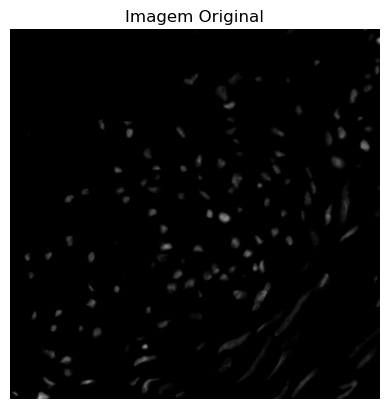

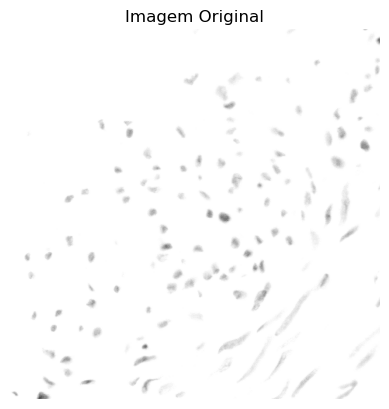

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Imagem Original")
plt.show()

plt.imshow(cv2.cvtColor(negative, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Imagem Original")
plt.show()



In [16]:
c = 255 / np.log(1 + np.max(img))
log_image = c * (np.log(img + 1))

c = 255 / np.log(1 + np.max(negative))
log_image_negative = c * (np.log(negative + 1))

C:\Users\Samuel\AppData\Local\Temp\ipykernel_15648\42154457.py:5: RuntimeWarning: divide by zero encountered in log
  log_image_negative = c * (np.log(negative + 1))


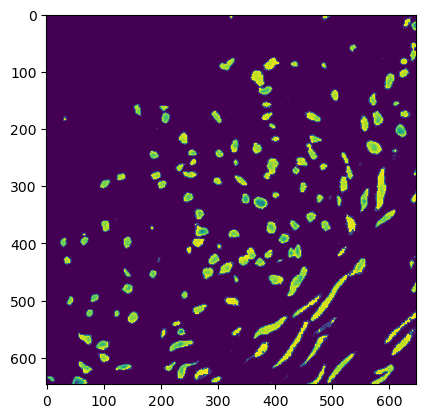

In [17]:
plt.imshow(log_image);
plt.imshow(log_image_negative);

2)
- Abra a imagem 'pout.tif' e mostre seu histograma.
- Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)
(procurar função OpenCV)



In [28]:
pout = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([pout], [0], None, [256], [0, 256])
equ = cv2.equalizeHist(pout)


(0.0, 256.0)

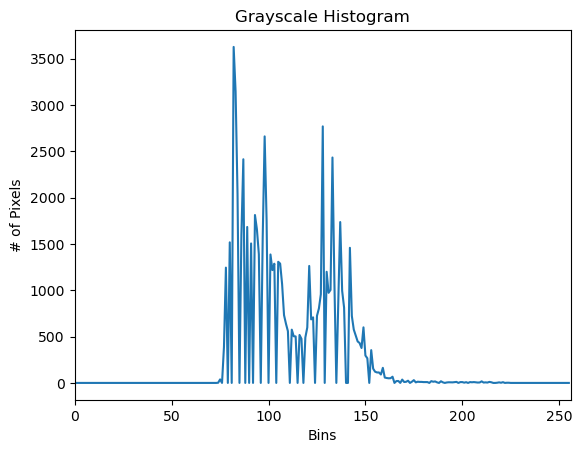

In [26]:
# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

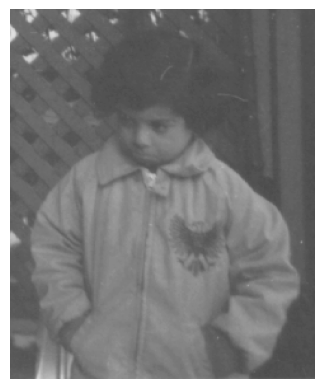

In [35]:
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(pout, cv2.COLOR_GRAY2RGB))


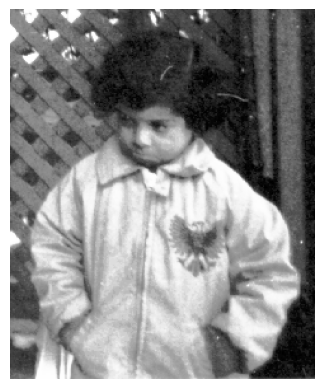

In [36]:
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(equ, cv2.COLOR_GRAY2RGB))

3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

In [41]:
hist, bins = np.histogram(pout.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = (cdf * 255) / cdf[-1]
equalized_image = cdf_normalized[pout]
equalized_image = np.uint8(equalized_image)


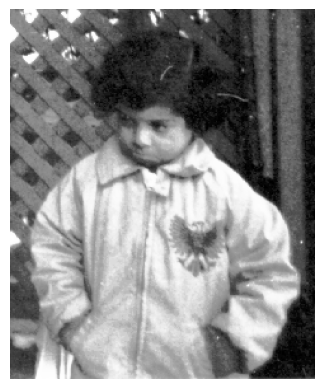

In [44]:
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2RGB))

In [45]:
hist, bins = np.histogram(equalized_image.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = (cdf * 255) / cdf[-1]
equalized_image_2 = cdf_normalized[equalized_image]
equalized_image_2 = np.uint8(equalized_image)

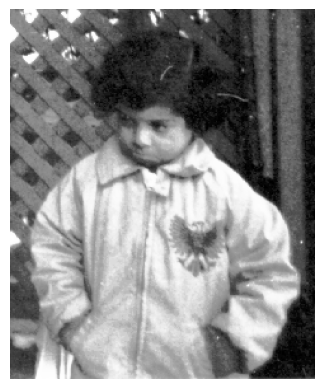

In [46]:
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(equalized_image_2, cv2.COLOR_GRAY2RGB))